In [47]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("../data/moore.csv", header=None).values
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [49]:
# reshape data to right format (data_count, feature_count)
x = data[:, 0].reshape(-1, 1)
x

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974],
       [1974],
       [1974],
       [1975],
       [1976],
       [1976],
       [1976],
       [1978],
       [1978],
       [1979],
       [1979],
       [1979],
       [1981],
       [1982],
       [1982],
       [1983],
       [1984],
       [1984],
       [1985],
       [1985],
       [1985],
       [1986],
       [1986],
       [1986],
       [1987],
       [1987],
       [1987],
       [1987],
       [1988],
       [1988],
       [1989],
       [1989],
       [1989],
       [1989],
       [1990],
       [1991],
       [1991],
       [1992],
       [1992],
       [1993],
       [1993],
       [1994],
       [1994],
       [1995],
       [1999],
       [1995],
       [1996],
       [1997],
       [1997],
       [1997],
       [1998],
       [1999],
       [1999],
       [2000],
       [2000],
       [1999],
       [1999],
       [1999],
       [2000],
       [2001],
       [2001],
       [2002],
       [20

In [50]:
y = data[:, 1]
y

array([       2300,        3500,        2500,        2500,        4100,
              4500,        8000,        3510,        5000,        8500,
              6500,        9000,       29000,       17500,       29000,
             68000,       11500,       55000,      134000,       22000,
             63000,      190000,      275000,       25000,       16000,
            110000,      375000,       30000,      385000,      730000,
            273000,      553000,      180000,      250000,      600000,
           1000000,     1180235,      310000,     1200000,     1350000,
             35000,      600000,      900000,     2800000,     3100000,
            578977,     2500000,     2500000,      111000,     5500000,
           4300000,    10000000,     7500000,     8800000,     7500000,
           9500000,    13500000,    21000000,    21000000,    27400000,
          21300000,    22000000,    42000000,   191000000,    45000000,
          55000000,   112000000,   400000000,   169000000,   184

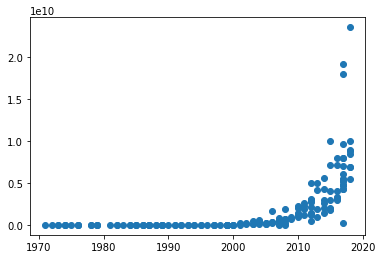

In [51]:
plt.scatter(x, y)

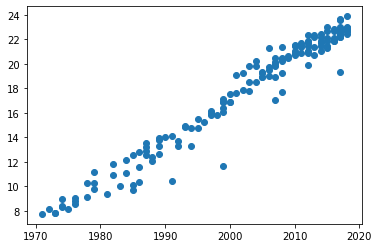

In [52]:
y = np.log(y)
plt.scatter(x, y)

In [53]:
# scale data
x = x - x.mean()

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer=tf.optimizers.SGD(0.001, 0.9), loss="mse")

In [55]:
def lr_schedule(epoch, lr):
    if lr < 0.0001:
        return lr
    if (epoch+1) % 10 == 0:
        return lr / 2.0
    return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [56]:
h = model.fit(x, y, epochs=50, callbacks=[scheduler])

Epoch 1/50
6/6 [==============================] - 0s 1ms/step - loss: 350.8596
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 338.8005
Epoch 3/50
6/6 [==============================] - 0s 1ms/step - loss: 303.7654
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 265.0697
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 175.7422
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 129.7465
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 86.2330
Epoch 8/50
6/6 [====================

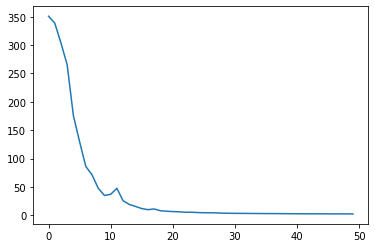

In [57]:
plt.plot(h.history["loss"])

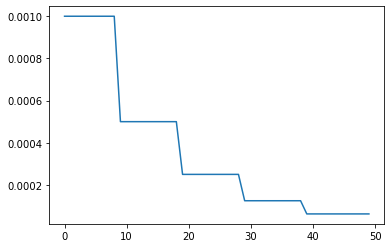

In [58]:
plt.plot(h.history["lr"])